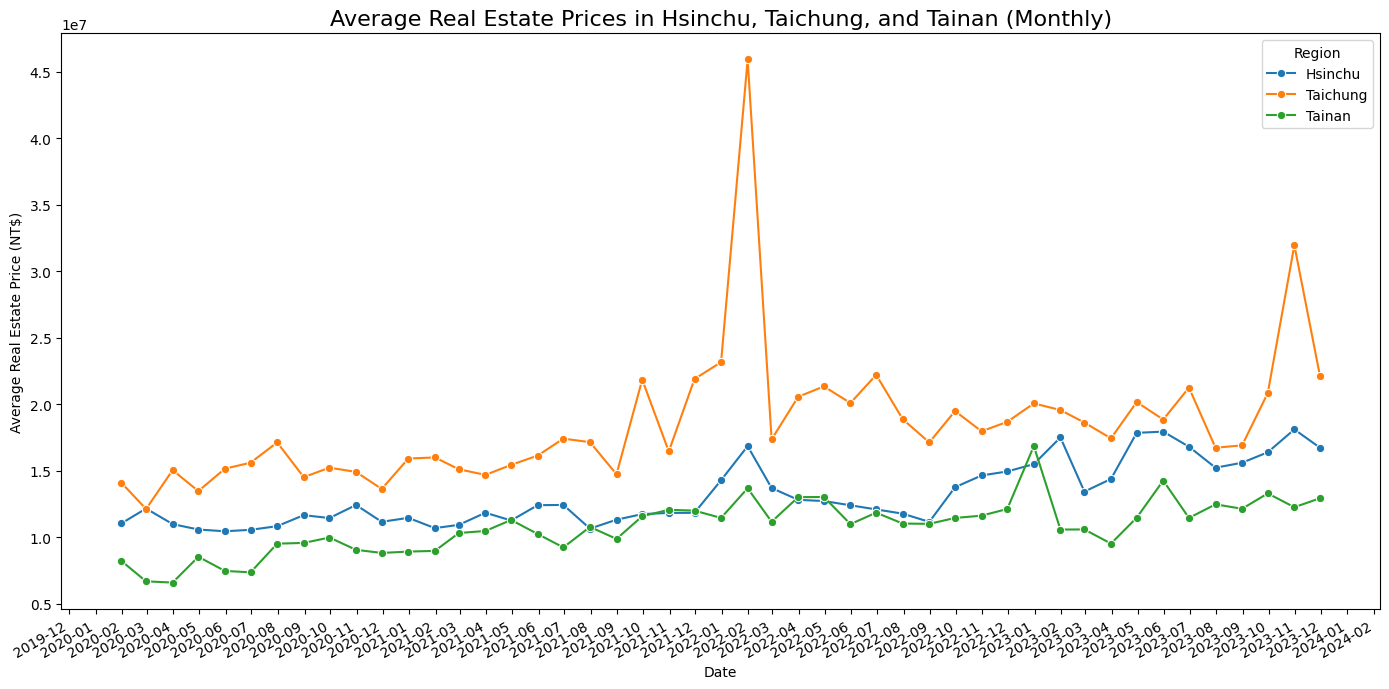

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 讀取數據
house_hsinchu_df = pd.read_csv('/Users/jennifershih/Downloads/house_Hsinchu.csv', parse_dates=['交易年月日'])
house_taichung_df = pd.read_csv('/Users/jennifershih/Downloads/house_Taichung.csv', parse_dates=['交易年月日'])
house_tainan_df = pd.read_csv('/Users/jennifershih/Downloads/house_Tainan.csv', parse_dates=['交易年月日'])

# 將每日數據聚合為每月數據
def aggregate_monthly(df, region_name):
    df['交易年月日'] = df['交易年月日'].dt.to_period('M').dt.to_timestamp() + pd.offsets.MonthEnd(0)
    monthly_df = df.groupby(df['交易年月日']).agg({'總價元': 'mean'}).reset_index()
    monthly_df['地區'] = region_name
    return monthly_df

# 聚合每個地區的數據
hsinchu_monthly = aggregate_monthly(house_hsinchu_df, 'Hsinchu')
taichung_monthly = aggregate_monthly(house_taichung_df, 'Taichung')
tainan_monthly = aggregate_monthly(house_tainan_df, 'Tainan')

# 合併數據
all_monthly = pd.concat([hsinchu_monthly, taichung_monthly, tainan_monthly])

# 設置起始和結束日期
start_date = pd.Timestamp('2020-01-01')
end_date = pd.Timestamp('2023-12-31')

# 篩選數據
all_monthly = all_monthly[(all_monthly['交易年月日'] >= start_date) & (all_monthly['交易年月日'] <= end_date)]

# 創建圖形和坐標軸
plt.figure(figsize=(14, 7))

# 繪製每個地區的房價折線圖
sns.lineplot(data=all_monthly, x='交易年月日', y='總價元', hue='地區', marker='o')

# 設置 x 軸刻度格式為“年月”
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# 旋轉 x 軸刻度標籤
plt.gcf().autofmt_xdate()

# 設置標籤和標題
plt.xlabel('Date')
plt.ylabel('Average Real Estate Price (NT$)')
plt.title('Average Real Estate Prices in Hsinchu, Taichung, and Tainan (Monthly)', fontsize=16)

# 顯示圖表
plt.legend(title='Region')
plt.tight_layout()
plt.show()
